<html>
    <h1>Libraries used :</h1>
    <ul style="list-style-type: none;">
        <li>
             <img width=150px height=150px  src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Sympy_logo.svg/1200px-Sympy_logo.svg.png"  alt="Sympy">
        </li>
        <br>
        <li>
             <img width=300px height=300px  src="https://matplotlib.org/_static/logo2.png" alt="Matplotlib">
        </li>
        <br>
        <li>
             <img width=200px height=200px src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/1200px-NumPy_logo.svg.png" alt="Numpy">
        </li>
        <br>
        <li>        
            <img width=200px height=200px  src="https://www.fullstackpython.com/img/logos/scipy.png" class="rounded" alt="Scipy">
        </li>
        <br>
        <li>
             <img width=400px height=400px  src="https://pandas.pydata.org/_static/pandas_logo.png" class="rounded" alt="Pandas">
        </li>
      </ul>

In [1]:
import numpy as np
from numba import jit, int32, float32, prange
from scipy.sparse import diags
from scipy.integrate import RK45, solve_ivp
import scipy.sparse as sp
import matplotlib.pyplot as plt
import matplotlib
from time import time
import pandas as pd

import time
import os
import math
#import pandas as pd
from tqdm import tqdm_notebook


In [ ]:
plt.ioff()
plt.clf()

<html>
    <h3 align="center" style="color:#FF1C0C;"><u> Heat Equation  </u> </h3> 
   <br>
</html>

\begin{equation}
\\\ u_t  + \beta u_{xx}    = - \left(\beta - 1\right) e^{t} \sin{\left(x \right)}
\\ u^h = \sum_{i= 0}^{n} a_i(t)  \phi_i(x) 
\\ \int_0^1 { (w u_t + \beta w u_{xx})} \ dx= \int_0^1 w (- \left(\beta - 1\right) e^{t} \sin{\left(x \right)}) dx
\\\ \int_0^1  w u_t   \ dx   - \beta \int_0^1 {w_x u_x} \ dx  + \beta \ (w(1) u_x(1) - w(0) u_x(0))= \int_0^1 w (- \left(\beta - 1\right) e^{t} \sin{\left(x \right)}) dx
\\  A \alpha^{'}(t) \hspace{5mm} \ -  \hspace{5mm}\beta  D \alpha(t) \hspace{10mm} +\hspace{10mm}  \beta E \alpha(t)   = f(t)
\\ w = {\phi_j}(x)
\end{equation}

\begin{equation}
\\  \alpha^{'}(t) = A^{-1}(\beta ( D - E) \alpha(t) + f(t)) \hspace{10mm} 
\end{equation}

<html>
    <h3 align="center" style="color:#FF1C0C;"><u>Boundary Conditions</u> </h3> <br>
</html>

\begin{equation}
\\  u(0, t) = 0  
\\  u(N, t) = e^t sin(1)  
\\  u(x, 0) = sin(x) 
\end{equation}

<html>
    <h3 align="center" style="color:#FF1C0C;"><u>Exact Solution</u> </h3> <br>
</html>
\begin{equation}
\\  u(x, t) = e^t sin (x) 
\end{equation}

In [23]:
class Matrices:

class Heat:
    
    #A *alpha - beta(D *) +beta(E(1 - 0)alpha) = 0
    

    def __init__(self, N=10):
        
        self.N = N
        self.H = 1/N
        self.domain = np.linspace(0, 1, N+1) 
        self.beta = -1
        self.t = 1
        self.b_c_start = 0
        self.b_c_end = math.exp(1)*math.sin(1)
        
        def c_dash_transform(l):
            
            l[0] /= self.A[0]
            for i in range(1, self.N):
                  l[i] = (l[i])/ (self.A[i]-(self.H/6)* l[i-1])
                    
            return l        
  

        self.A = self.H* np.array([1/3] + [2/3]*(N-1) + [1/3])
        #         self.A = (self.H) * sp.csc_matrix(diags([       [1/6 for i in range(N)],   \
        #                                         [1/3] + [2/3]*(N-1) + [1/3], \
        #                                              [1/6 for i in range(N)] ], \
        #                                                    [1, 0, -1]), dtype=np.float32)
        
        self.c_dash = c_dash_transform(self.H *np.array( [1/6]*(N)))
        
        #-beta*
        
        
        self.D = N * sp.csr_matrix(diags([      [-1 for i in range(N)],  \
                                      [1] + [2]*(N-1) + [1], \
                                        [-1 for i in range(N)]],  \
                             [1, 0, -1] ), dtype=np.float32)
        self.D[0, 0] -= N     
        self.D[0, 1] -= -N
        self.D[N, N-1] -= -N
        self.D[N, N] -= N
                       #+                


        self.f_t = lambda t:math.exp(t)*self.f_without_t
     

   
        #Set initial conditions here
        self.alpha = np.sin(self.domain).reshape(N+1, 1)
        
        #Set solution here
        self.exact_solution = lambda t: np.sin(self.domain).reshape(-1, 1).dot(np.exp(t).reshape(1, -1))
        

In [24]:
class Methods(Matrices): 
    
    def __init__(self, num_basis = 10, method="Adam"):
        
        super().__init__(num_basis)
        eval("self."+method+"()")
        
        self.approx_half, self.approx_one = np.split(self.algo.y.flatten("F"), len(self.algo.t))  

        self.exact_half, self.exact_one =\
                            np.split(self.exact_solution(self.algo.t).flatten("F"), len(self.algo.t))

        self.error_half = math.sqrt(sum((self.approx_half - self.exact_half)**2))
        self.error_one = math.sqrt(sum((self.approx_one - self.exact_one)**2))
        
    

        
    def fun(self, t, y):

        y[0] = 0
        y[-1] = math.exp(t)* math.sin(1)
        y = y.reshape(-1, 1)

        return la.inv(self.A).dot(self.beta*(self.D - self.E).dot(y) + self.f_t(t))
    
    def Adam(self):   
        self.algo = solve_ivp(self.fun,t_span=(0, 1),  y0=self.alpha.ravel(), \
                     t_eval= [0.5, 1], vectorized=True, first_step = self.h, method="LSODA")
        self.algo.y[0, :] = 0; self.algo.y[-1, :] = np.exp(self.algo.t)* math.sin(1)   # refresh boundary conditions
        
        

    def RK45(self):
        pass


In [68]:
plt.plot(heateqn.domain, heateqn_approx_one,"b-", heateqn.domain,  heateqn.exact_one,"r--")

NameError: name 'heateqn_approx_one' is not defined

In [34]:
points = [2**j for j in range(2, 10)]

half = pd.DataFrame(data =None, columns=["Approximate", "Exact", "Errors"])
one = pd.DataFrame(data =None, columns=["Approximate", "Exact", "Errors"])

for i in tqdm_notebook(points):
    heateqn = Methods(i, method="Adam")
    half.loc[i] = [heateqn.approx_half, heateqn.exact_half, heateqn.error_half]
    one.loc[i] = [heateqn.approx_one, heateqn.exact_one, heateqn.error_one]

In [49]:
a = one.loc[:128].Errors.values
b = np.array([2**j for j in range(2, 8)])

In [58]:
one_ = one.loc[:128]

In [59]:
one_["metric"] = 

,Approximate,Exact,Errors
4,"[0.0, 0.6631482225504004, 1.287272199821361, 1...","[0.0, 0.6725136867303917, 1.3032137296869954, ...",0.030328
8,"[0.0, 0.33768278794235423, 0.6704944745211849,...","[0.0, 0.3389010622290407, 0.6725136867303917, ...",0.011817
16,"[0.0, 0.169627129346234, 0.33864572719534713, ...","[0.0, 0.16978202870888992, 0.3389010622290407,...",0.004387
32,"[0.0, 0.08492132623814808, 0.16976652779561005...","[0.0, 0.08493248191807777, 0.16978202870888992...",0.001656
64,"[0.0, 0.04247029187595174, 0.08493107724243128...","[0.0, 0.04247142535372606, 0.08493248191807777...",0.000482
128,"[0.0, 0.021237232375884426, 0.0424732762159358...","[0.0, 0.02123636075586518, 0.04247142535372606...",0.000376


In [56]:
np.polyfit(-np.log(b), -np.log(a), deg=1 )

array([-1.34055889,  1.70010475])

In [35]:
# half = pd.read_csv("L HE with NH B.C. t=.5.csv", index_col=0)
# one = pd.read_csv("L HE with NH B.C. t=1.csv", index_col=0)

In [36]:
# half.to_csv("L HE with NH B.C. t=.5.csv")
# one.to_csv("L HE with NH B.C. t=1.csv")

ValueError: setting an array element with a sequence.

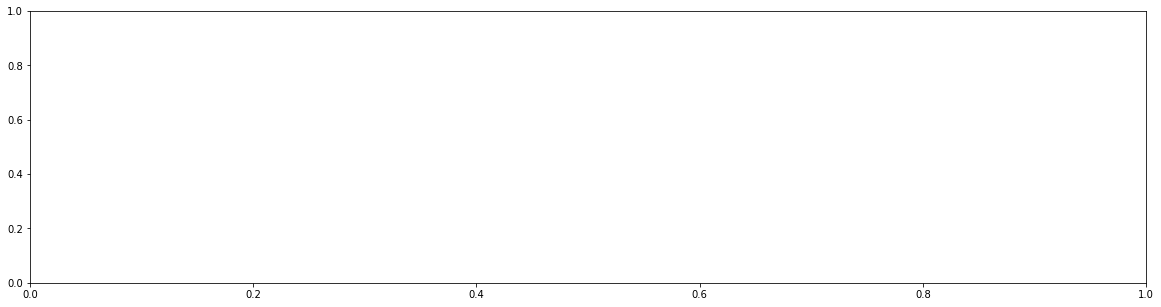

In [37]:
plt.figure(figsize=(20, 5))

plt.scatter(-half.iloc[:, -2], -half.iloc[:, -1])

plt.title("LH - Log h vs Log Error")
# _=plt.xticks(-half.iloc[:, -2], labels=np.array(half.index), rotation=45)
# _=plt.yticks(-half.iloc[:, -1], labels=half.iloc[:, -3]/max(half.iloc[:, -3]), rotation=45)

In [40]:
one.head()

,Approximate,Exact,Errors
4,"[0.0, 0.6631482225504004, 1.287272199821361, 1...","[0.0, 0.6725136867303917, 1.3032137296869954, ...",0.030328
8,"[0.0, 0.33768278794235423, 0.6704944745211849,...","[0.0, 0.3389010622290407, 0.6725136867303917, ...",0.011817
16,"[0.0, 0.169627129346234, 0.33864572719534713, ...","[0.0, 0.16978202870888992, 0.3389010622290407,...",0.004387
32,"[0.0, 0.08492132623814808, 0.16976652779561005...","[0.0, 0.08493248191807777, 0.16978202870888992...",0.001656
64,"[0.0, 0.04247029187595174, 0.08493107724243128...","[0.0, 0.04247142535372606, 0.08493248191807777...",0.000482


Text(0.5, 1.0, 'x -->log N y--->log E')

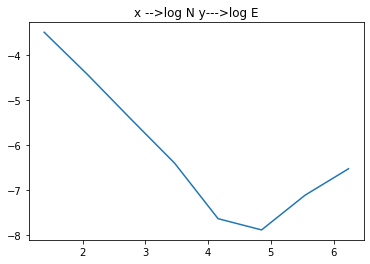

In [39]:
%matplotlib inline
plt.plot(np.log(one.index.tolist()), np.log(one.Errors))
plt.title("x -->log N y--->log E")